# What is the Best Neighborhood in Pittsburgh?
## Group: "Where is D?"
### Members: Sophie, Emma, and Darian
---


## Introduction
### For our project, we decided to compare the length of steps to the number of playgrounds in each neighborhood in order to determine the best neighborhood in the city of Pittsburgh. We decided to focus on these aspects in order to determine how active of a lifestyle one would have if they were to live in a particular neighborhood. Also, it would be the most fun way to stay active for all demographics of age. As we were exploring the data on the WPRDC, we first noticed a comprehensive playgrounds data sheet and wanted to compare it to the number of pools in each neighborhood data sheet we also found, but the data sheets were comprised in a way that were just too complicated to compare. We then went through comparing number of pools to water fountains in each neighboorhood and that was complicated as well, so we had to completely change course and eventually decided to compare the length of steps and number of playgrounds in each neighborhood. Coming up with the way to determine the best neighborhood based on the data we were using also had its challenges. After much thought, we eventually decided to determine the average of length of steps and the average of playgrounds and compare the two as a ratio of percentages so that the neighborhood with the highest percentage of length of steps and number of playgrounds would be determined as the best neighborhood in Pittsburgh. 
---
### Our Metric
#### In order to calculate our metric, we had to normalize the data so that we could easily compare the two datasets. We found the total length of steps and number of playgrounds for each neighborhood, and then calculated the average for each. We then divided the total length of steps and number of playgrounds in each neighborhood by their respective average. This made a score for the length of steps and the number of playgrounds for each neighborhood. One we had the scores, we added them together to create a combined metric to rank the best neighborhood. 

In [17]:
import pandas as pd
import operator
%matplotlib inline
from collections import OrderedDict, defaultdict, Counter
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot, transforms
from matplotlib.pyplot import figure

In [2]:
steps = pd.read_csv("steps.csv")
steps.head(5)

,id,name,maintenance_responsibility,installed,material,length,number_of_steps,schools_count,school_score,total_population,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1687549925,Walden St from Westwood St to Larkfield Way,5th Division,NaN,Wood,125.0,58.0,0.0,100.0,1145.0,...,Mount Washington,2.0,19,42003191500,5,19,3,4-27,40.424183,-80.005725
1,1074700399,1017 St Martin St,4th Division,NaN,Concrete,52.0,NaN,NaN,NaN,NaN,...,South Side Slopes,3.0,17,42003170600,3,17,3,4-6,40.422471,-79.987604
2,652746099,56th St from Carnegie St to Duncan St,2nd Division,1946-01-01,Concrete,468.0,249.0,0.0,100.0,507.0,...,Upper Lawrenceville,7.0,10,42003101100,2,10,2,3-5,40.483330,-79.946816
3,1983187753,Kendall St from Kent Way to Duncan St,2nd Division,1951-01-01,Concrete,433.0,163.0,NaN,NaN,NaN,...,Upper Lawrenceville,7.0,10,42003101100,2,10,2,3-5,40.481533,-79.947972
4,249264327,56th St from Duncan to Wickliff St,2nd Division,1946-01-01,Concrete,167.0,26.0,NaN,NaN,NaN,...,Upper Lawrenceville,7.0,10,42003101100,2,10,2,3-5,40.482625,-79.945932


![steps](http://www.pittsburghcityliving.com/img/heroes/steps%20walkers.jpg)

In [3]:
playgrounds = pd.read_csv("playgrounds.csv")
playgrounds.head(5)

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,420573029,Armstrong Playground,NaN,Parks - Southern,Armstrong Park,S 12TH ST,https://tools.wprdc.org/images/pittsburgh/play...,South Side Flats,3,17,42003170200,3,17,3,4-24,40.428165,-79.986121
1,113170092,Arsenal Playground,NaN,Parks - Northeast,Arsenal Park,40TH ST,https://tools.wprdc.org/images/pittsburgh/play...,Lower Lawrenceville,7,6,42003060300,2,6,2,3-3,40.466721,-79.961520
2,2089697067,August WIlson Playground,NaN,Parks - Schenley,August Wilson Park,CLIFF ST,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.446510,-79.985968
3,2124405123,Banksville Playground,NaN,Parks - Western,Banksville Park,CRANE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Banksville,2,20,42003202300,5,20,6,4-9,40.414666,-80.039342
4,202656658,Baxter Playground,NaN,Parks - Eastern,Baxter Park,FRANKSTOWN AVE,https://tools.wprdc.org/images/pittsburgh/play...,Homewood North,9,13,42003130200,2,13,5,3-17,40.456141,-79.889501


![playground](https://i.pinimg.com/originals/a7/0b/59/a70b59d9392cb798c6198f89aa26b513.jpg)

#### In this piece of code we added the total length of steps for each neighborhood.

In [4]:
grouped_by_neighborhood = steps.groupby('neighborhood')
sumofsteps = grouped_by_neighborhood['length'].sum().sort_values(ascending=False)
print(sumofsteps)
length = len(grouped_by_neighborhood)
print(length)

neighborhood
South Side Slopes        16305.0
Beechview                 9834.0
Perry South               7696.0
Mount Washington          6368.0
Brookline                 5806.0
Hazelwood                 5408.0
Marshall-Shadeland        5376.0
Carrick                   4990.0
Sheraden                  4496.0
Greenfield                4440.0
Fineview                  3821.0
Elliott                   3821.0
Duquesne Heights          3276.0
Overbrook                 3259.0
Perry North               2971.0
Beltzhoover               2672.0
Spring Hill-City View     2611.0
Polish Hill               2599.0
Troy Hill                 2577.0
Upper Hill                2390.0
Upper Lawrenceville       2358.0
Crafton Heights           2344.0
Stanton Heights           2139.0
East Hills                2100.0
Garfield                  2062.0
Arlington                 1836.0
California-Kirkbride      1737.0
Banksville                1549.0
Middle Hill               1490.0
Squirrel Hill South       1481

#### Here we found the average length of steps per neighborhood.

In [5]:
addsteps = sumofsteps.sum()
print(addsteps)
avgsteps = addsteps/length
print(avgsteps)

143632.0
2051.885714285714


#### This is where we divided the total length of steps in each neighborhood by the average length of steps. This was a way to normalize the data and make it comparable to the playground dataset.

In [6]:
sumofsteps = grouped_by_neighborhood['length'].sum().sort_values(ascending=False)/avgsteps
print(sumofsteps)

neighborhood
South Side Slopes        7.946349
Beechview                4.792665
Perry South              3.750696
Mount Washington         3.103487
Brookline                2.829592
Hazelwood                2.635624
Marshall-Shadeland       2.620029
Carrick                  2.431909
Sheraden                 2.191155
Greenfield               2.163863
Fineview                 1.862189
Elliott                  1.862189
Duquesne Heights         1.596580
Overbrook                1.588295
Perry North              1.447936
Beltzhoover              1.302217
Spring Hill-City View    1.272488
Polish Hill              1.266640
Troy Hill                1.255918
Upper Hill               1.164782
Upper Lawrenceville      1.149187
Crafton Heights          1.142364
Stanton Heights          1.042456
East Hills               1.023449
Garfield                 1.004929
Arlington                0.894787
California-Kirkbride     0.846538
Banksville               0.754915
Middle Hill              0.726161
S

#### Here we put the score of length of steps into a dictionary. Each neighborhood is an index with the step score as it's value, which would make it easier to compare them to the playground dictionary values later on in our metric.

In [7]:
stepdict = sumofsteps.to_dict()
stepdict

{'South Side Slopes': 7.946349003007687,
 'Beechview': 4.792664587278601,
 'Perry South': 3.7506962236827452,
 'Mount Washington': 3.103486688203186,
 'Brookline': 2.8295922914113847,
 'Hazelwood': 2.6356243733986857,
 'Marshall-Shadeland': 2.6200289629052023,
 'Carrick': 2.4319093238275595,
 'Sheraden': 2.19115517433441,
 'Greenfield': 2.1638632059708143,
 'Fineview': 1.862189484237496,
 'Elliott': 1.862189484237496,
 'Duquesne Heights': 1.5965801492703577,
 'Overbrook': 1.5882950874456947,
 'Perry North': 1.4479363930043445,
 'Beltzhoover': 1.3022167762058596,
 'Spring Hill-City View': 1.272488024952657,
 'Polish Hill': 1.2666397460176007,
 'Troy Hill': 1.2559179013033308,
 'Upper Hill': 1.1647822212320376,
 'Upper Lawrenceville': 1.149186810738554,
 'Crafton Heights': 1.1423638186476552,
 'Stanton Heights': 1.0424557201737774,
 'East Hills': 1.0234488136348447,
 'Garfield': 1.0049292636738332,
 'Arlington': 0.894786677063607,
 'California-Kirkbride': 0.846538375849393,
 'Banksville'

#### This graph shows the steps scores for each neighborhood. 

Text(0.5,1,'Steps Scores')

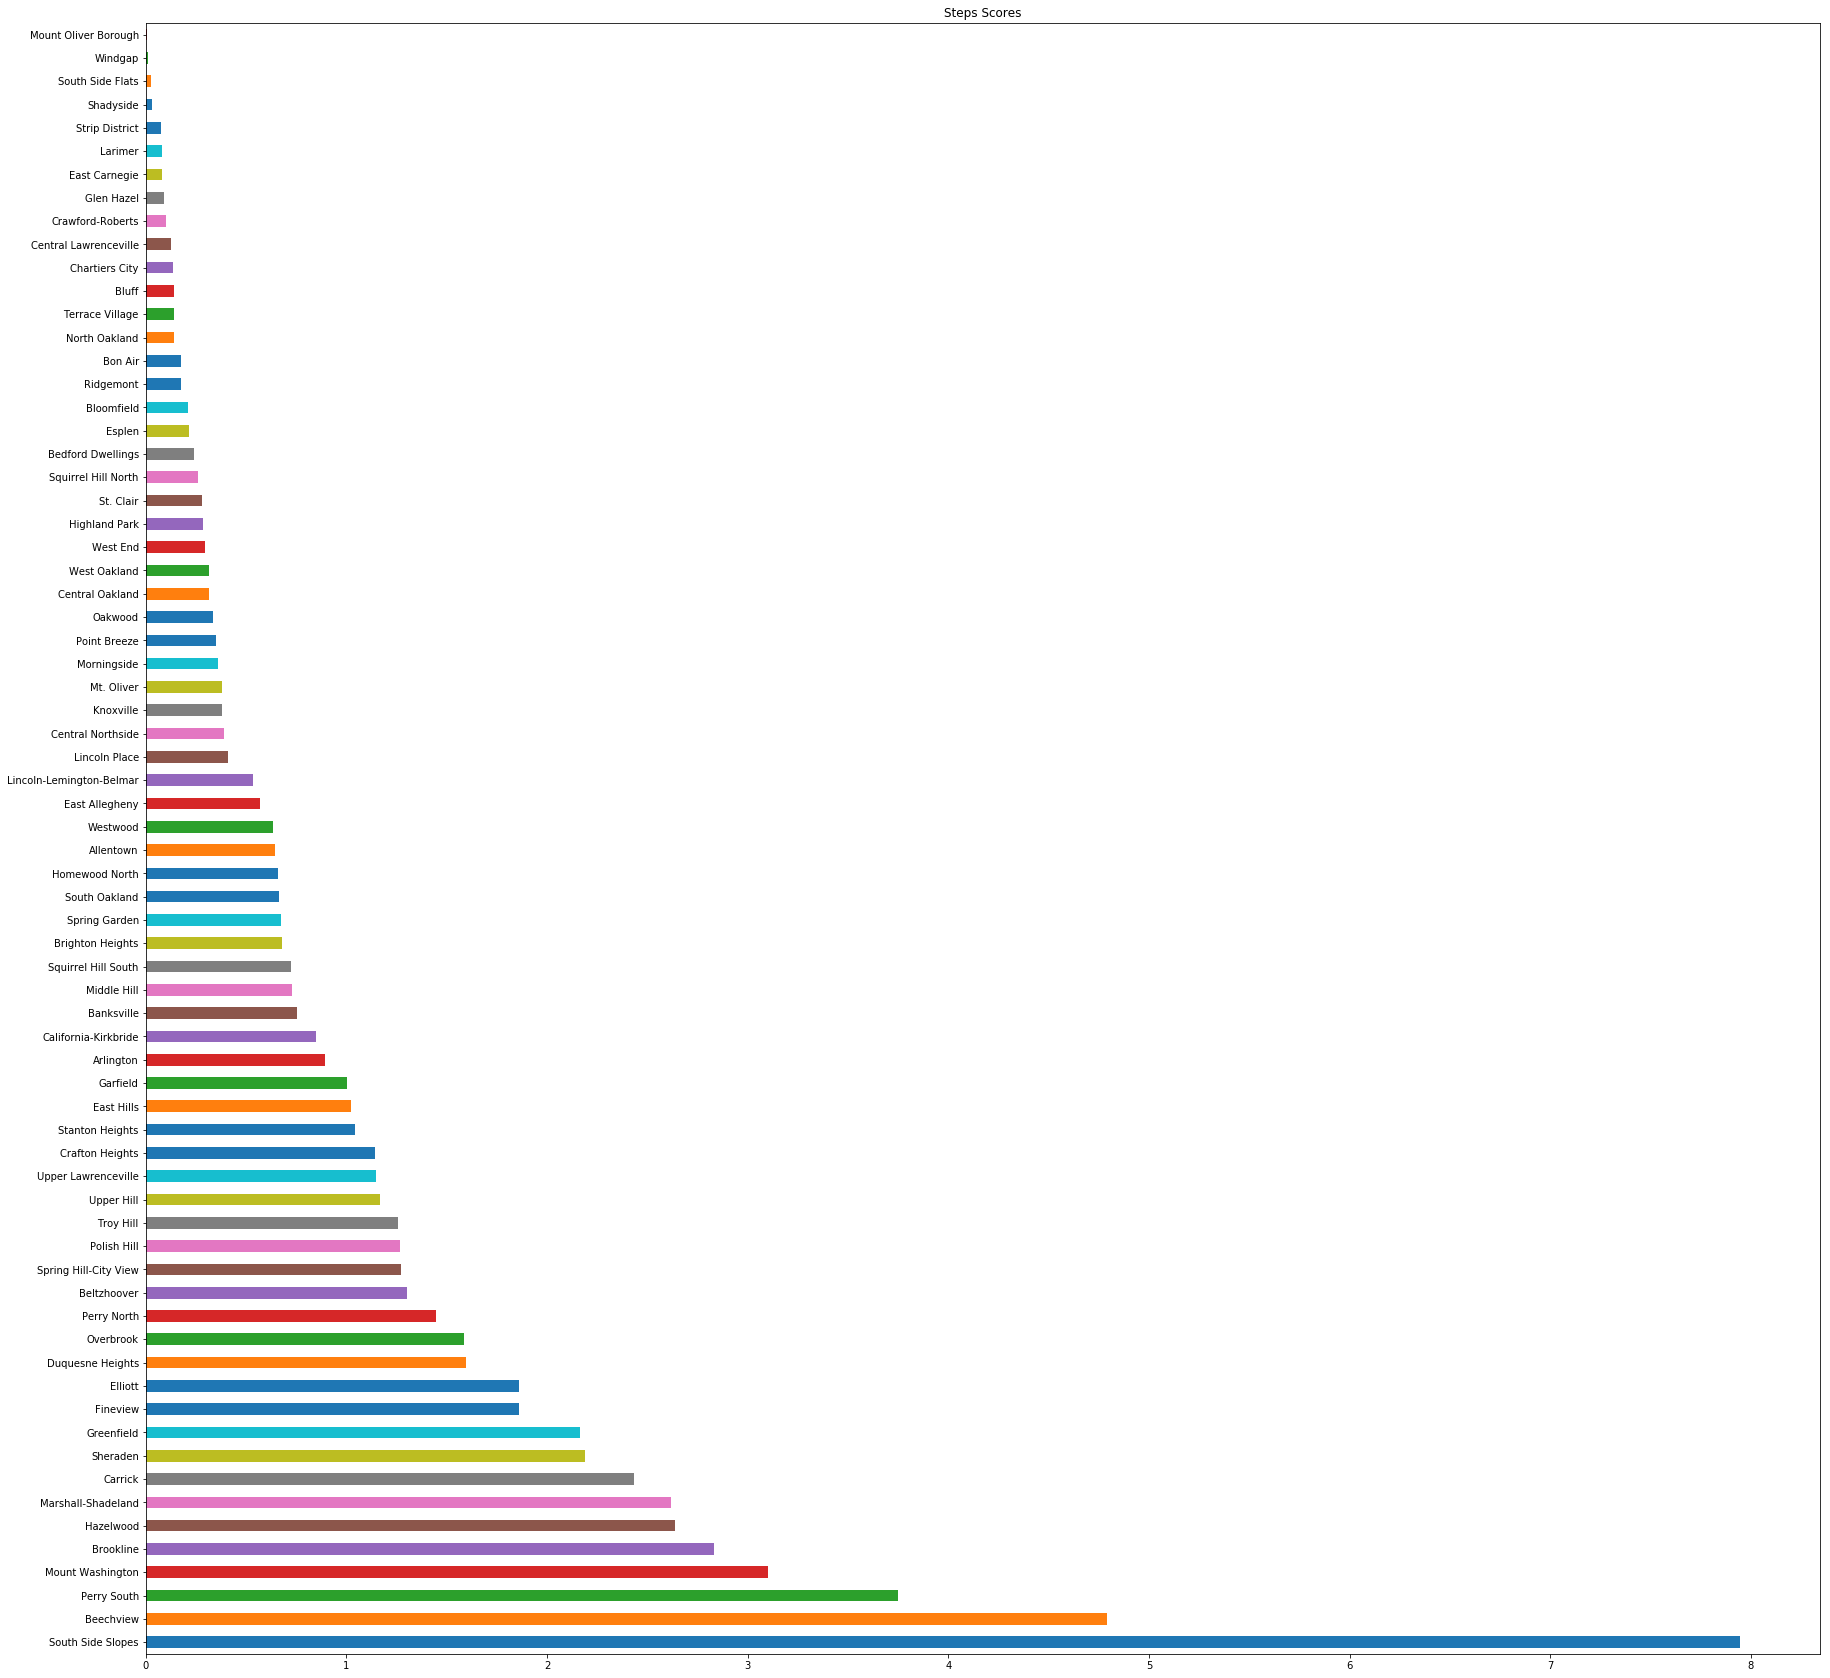

In [11]:
d = pd.Series(stepdict, name='DateValue')
d.plot.barh(stacked = True, figsize=(30,30))
plt.title("Steps Scores")

#### In this piece of code, we counted the number of playgrounds per neighborhood using a dictionary.

In [8]:
items = {}
n = 0
i = 1
x = 0

while n < len(playgrounds):
    playcount = playgrounds.iloc[n,7]
    if playcount in items:
        items[playcount] = items[playcount] + 1
        x = x + 1
    else: 
        items[playcount] = 1
        i = i + 1
        x = x + 1
    n = n + 1
items,i,x

({'South Side Flats': 2,
  'Lower Lawrenceville': 1,
  'Crawford-Roberts': 3,
  'Banksville': 1,
  'Homewood North': 1,
  'Bon Air': 1,
  'Central Oakland': 1,
  'Brighton Heights': 2,
  'Brookline': 2,
  'Hazelwood': 3,
  'Squirrel Hill South': 8,
  'Spring Garden': 1,
  'Lincoln-Lemington-Belmar': 2,
  'Windgap': 1,
  'Troy Hill': 2,
  'Westwood': 1,
  'Perry South': 1,
  'Homewood West': 1,
  'Allegheny Center': 4,
  'Strip District': 1,
  'Stanton Heights': 1,
  'Crafton Heights': 2,
  'West Oakland': 1,
  'East Carnegie': 1,
  'Duquesne Heights': 1,
  'South Side Slopes': 5,
  'East Liberty': 2,
  'Esplen': 1,
  'Fairywood': 1,
  'Highland Park': 4,
  'Upper Lawrenceville': 2,
  'Fineview': 1,
  'Regent Square': 1,
  'Garfield': 2,
  'Greenfield': 2,
  'South Oakland': 3,
  'Allentown': 1,
  'Hays': 1,
  'Elliott': 3,
  'Morningside': 2,
  'Central Northside': 2,
  'Larimer': 1,
  'Carrick': 3,
  'Central Lawrenceville': 1,
  'Lincoln Place': 2,
  'Manchester': 2,
  'Marshall-Shad

#### Here we created another dictionary to find the playgrounds score by dividing the total number of playgrounds per neighborhood by the average number. The index for this dictionary is the neighborhood name and the value is the playgrounds score.

In [9]:
playgrounds_per_neighborhood = x/i
print(playgrounds_per_neighborhood)

items2 = {}
n = 0
i = 1
x = 0

while n < len(playgrounds):
    playcount = playgrounds.iloc[n,7]
    if playcount in items2:
        items2[playcount] = items2[playcount] + 1/playgrounds_per_neighborhood
        x = x + 1
    else: 
        items2[playcount] = 1/playgrounds_per_neighborhood
        i = i + 1
        x = x + 1
    n = n + 1
items2,i,x

1.7794117647058822


({'South Side Flats': 1.1239669421487604,
  'Lower Lawrenceville': 0.5619834710743802,
  'Crawford-Roberts': 1.6859504132231407,
  'Banksville': 0.5619834710743802,
  'Homewood North': 0.5619834710743802,
  'Bon Air': 0.5619834710743802,
  'Central Oakland': 0.5619834710743802,
  'Brighton Heights': 1.1239669421487604,
  'Brookline': 1.1239669421487604,
  'Hazelwood': 1.6859504132231407,
  'Squirrel Hill South': 4.4958677685950414,
  'Spring Garden': 0.5619834710743802,
  'Lincoln-Lemington-Belmar': 1.1239669421487604,
  'Windgap': 0.5619834710743802,
  'Troy Hill': 1.1239669421487604,
  'Westwood': 0.5619834710743802,
  'Perry South': 0.5619834710743802,
  'Homewood West': 0.5619834710743802,
  'Allegheny Center': 2.2479338842975207,
  'Strip District': 0.5619834710743802,
  'Stanton Heights': 0.5619834710743802,
  'Crafton Heights': 1.1239669421487604,
  'West Oakland': 0.5619834710743802,
  'East Carnegie': 0.5619834710743802,
  'Duquesne Heights': 0.5619834710743802,
  'South Side 

#### This graph shows the playground scores for each neighborhood.

Text(0.5,1,'Playground Scores')

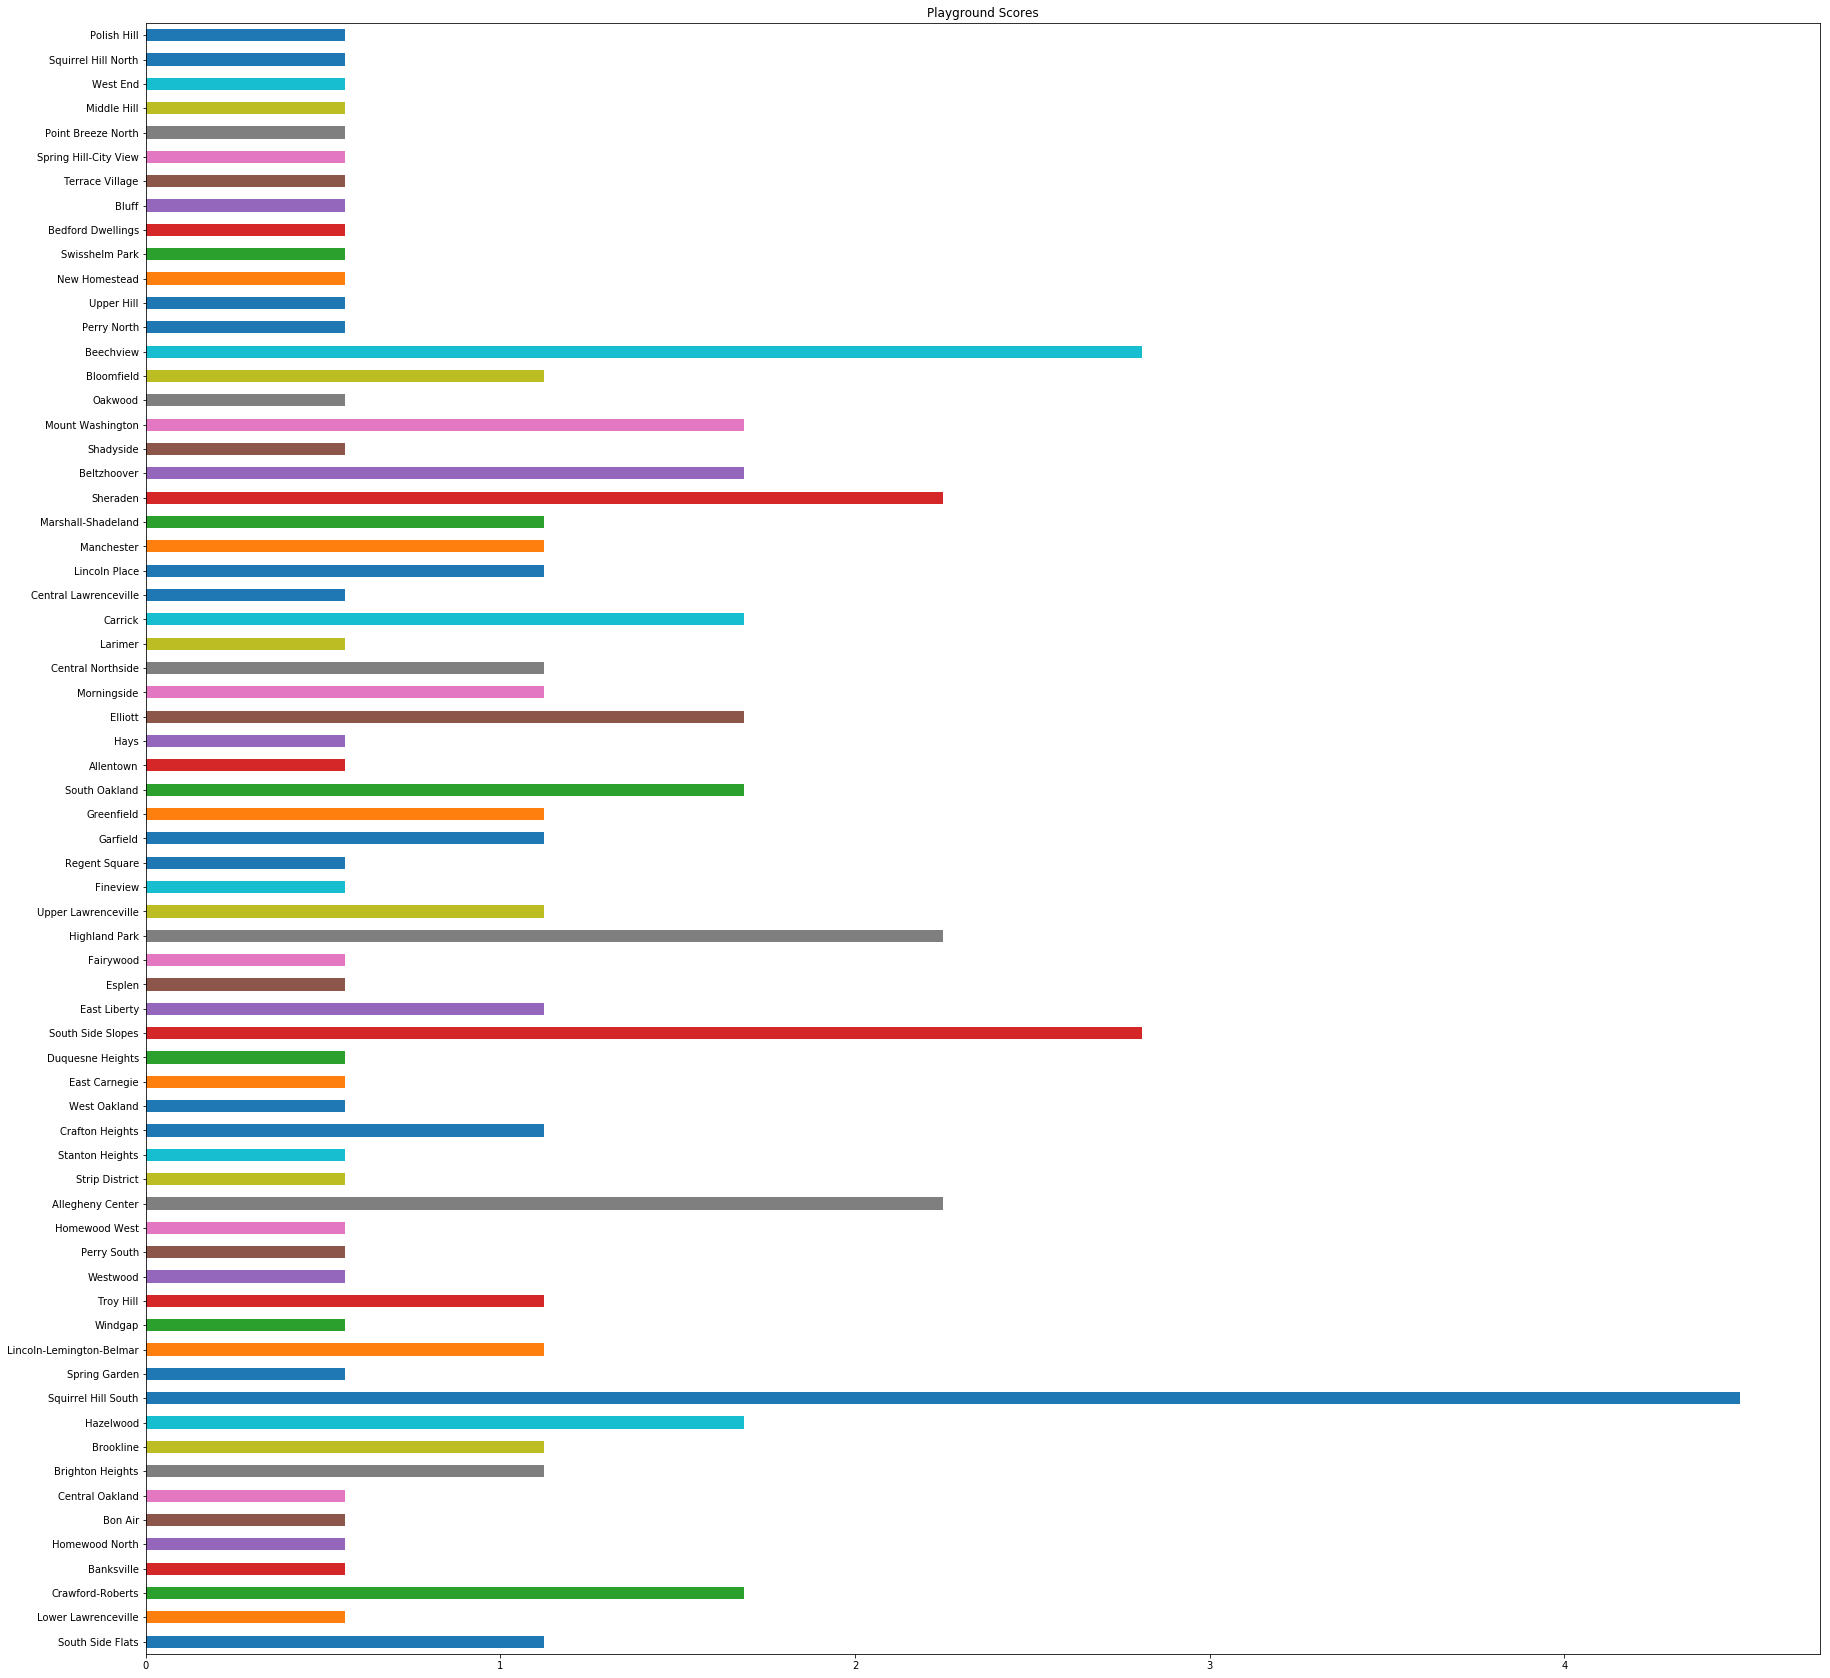

In [10]:
s = pd.Series(items2, name='DateValue')
s.plot.barh(stacked=True, figsize=(30,30))
plt.title("Playground Scores")

#### Since our playground scores and steps scores are in dictionaries with the neighborhoods as indexes, we were able to combine them in a way that adds the values of duplicate objects in the dictionaries. This gave us the total scores for each neighborhood, i.e. the "best-ness" of each neighborhood.

In [12]:
a = stepdict
b = items2
agg = dict(Counter(a)+Counter(b))
agg

{'South Side Slopes': 10.756266358379587,
 'Beechview': 7.602581942650502,
 'Perry South': 4.312679694757126,
 'Mount Washington': 4.789437101426326,
 'Brookline': 3.953559233560145,
 'Hazelwood': 4.321574786621826,
 'Marshall-Shadeland': 3.7439959050539624,
 'Carrick': 4.117859737050701,
 'Sheraden': 4.4390890586319305,
 'Greenfield': 3.287830148119575,
 'Fineview': 2.4241729553118763,
 'Elliott': 3.5481398974606364,
 'Duquesne Heights': 2.158563620344738,
 'Overbrook': 1.5882950874456947,
 'Perry North': 2.0099198640787246,
 'Beltzhoover': 2.9881671894290003,
 'Spring Hill-City View': 1.834471496027037,
 'Polish Hill': 1.8286232170919807,
 'Troy Hill': 2.379884843452091,
 'Upper Hill': 1.7267656923064179,
 'Upper Lawrenceville': 2.2731537528873145,
 'Crafton Heights': 2.2663307607964156,
 'Stanton Heights': 1.6044391912481575,
 'East Hills': 1.0234488136348447,
 'Garfield': 2.1288962058225938,
 'Arlington': 0.894786677063607,
 'California-Kirkbride': 0.846538375849393,
 'Banksville':

#### This graph shows the total scores for each neighborhood.

Text(0.5,1,'Total Scores for Each Neighborhood')

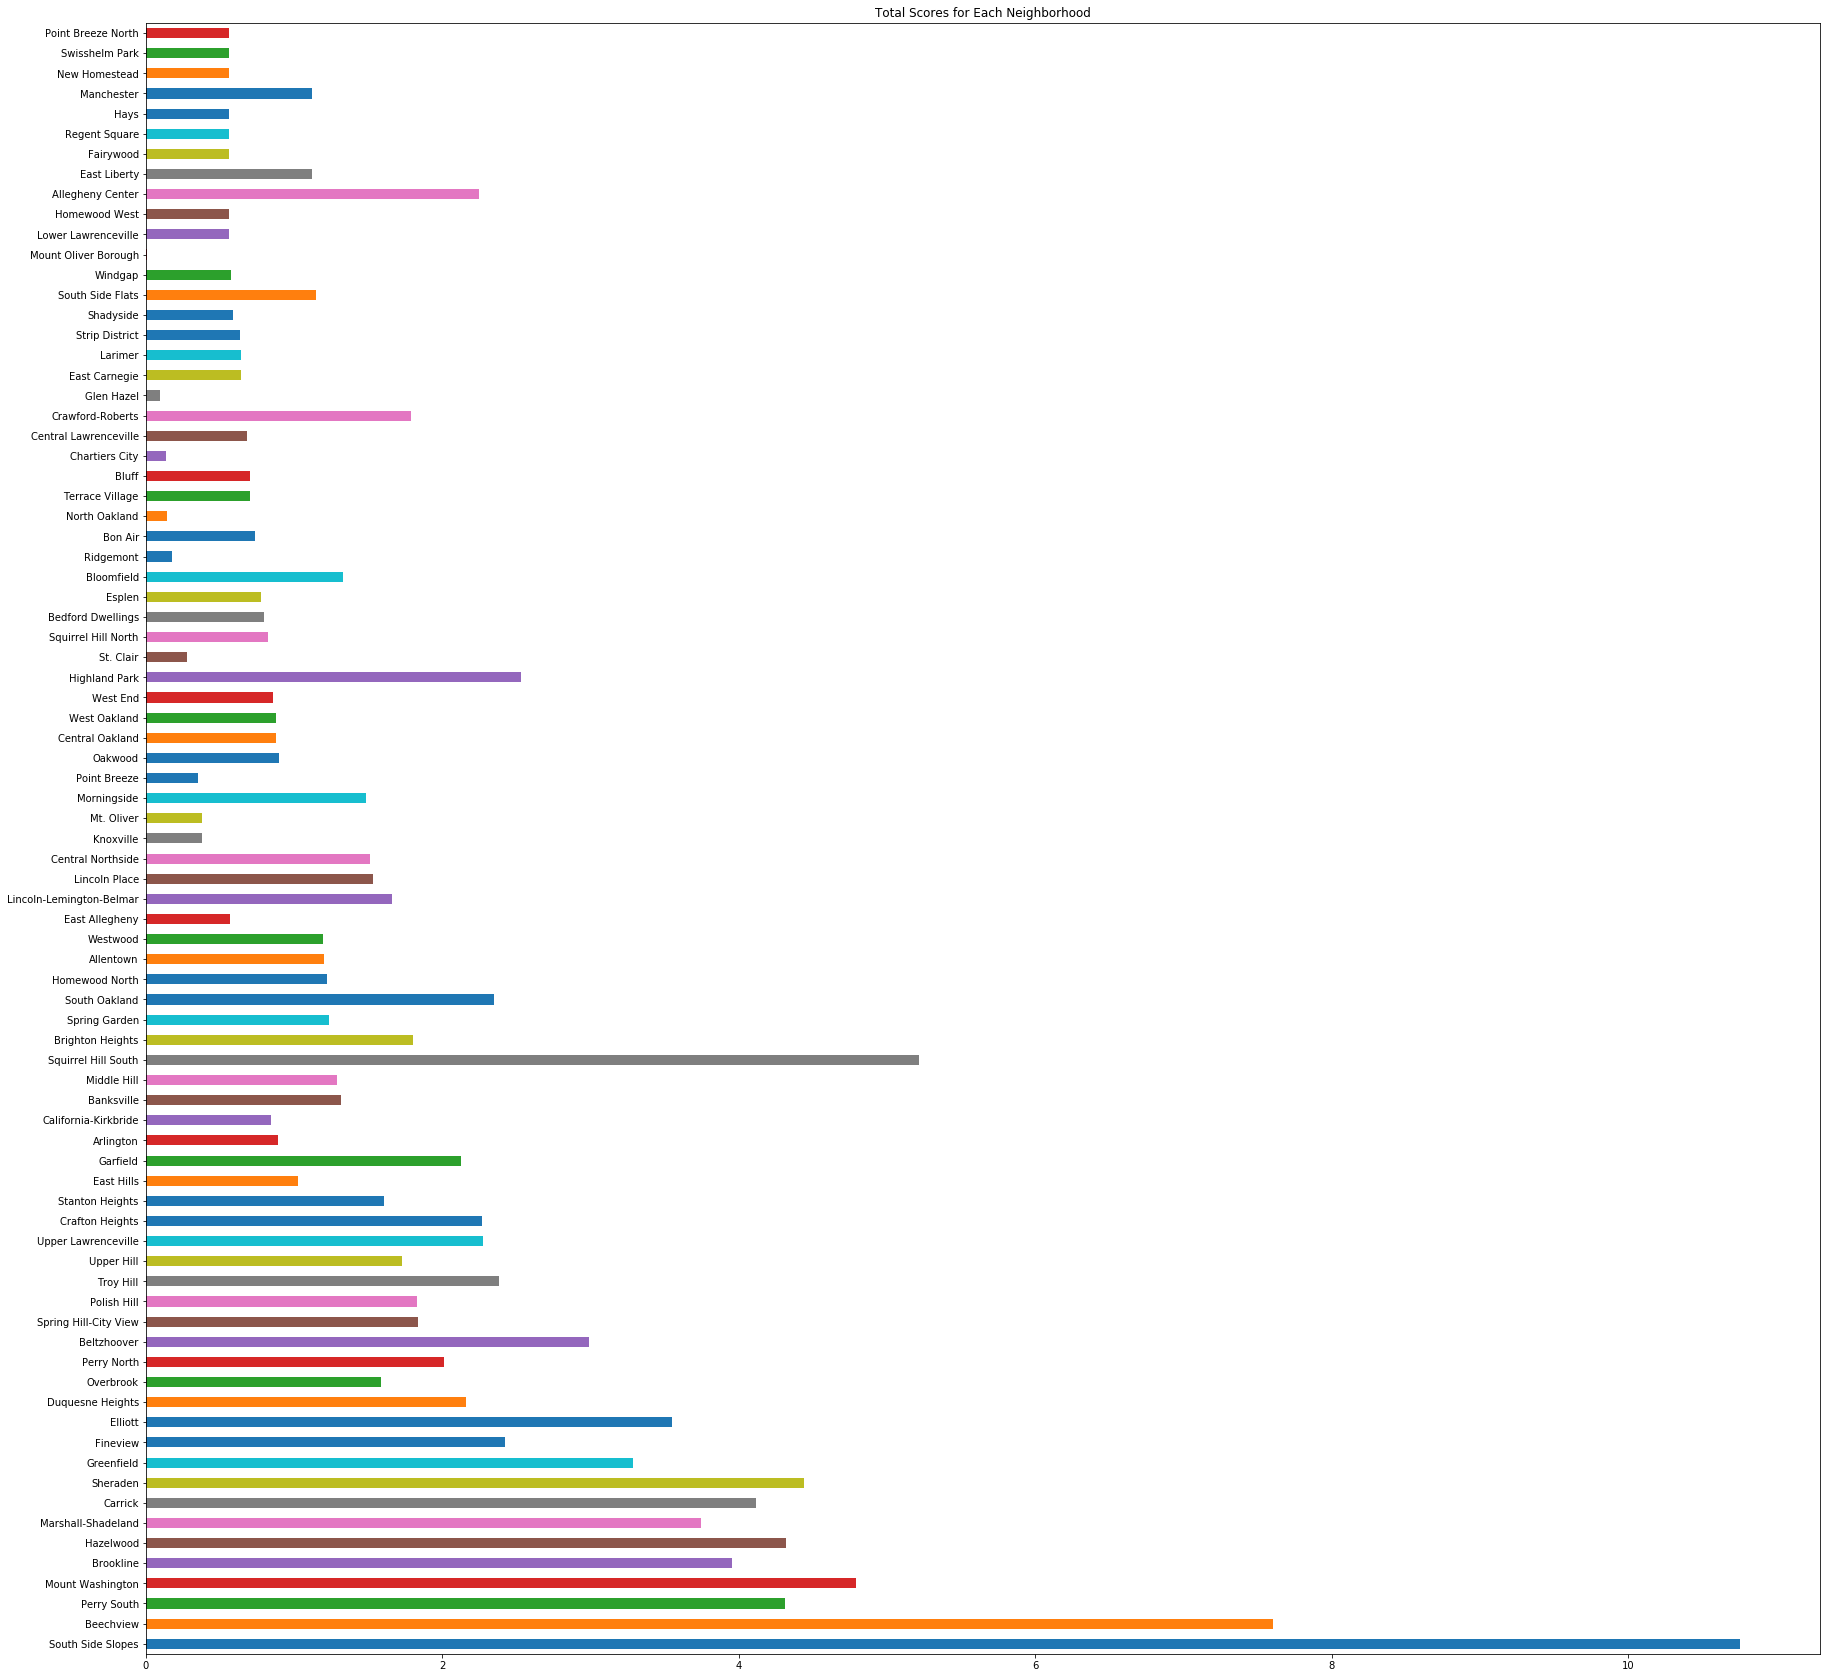

In [26]:
nayrad = pd.Series(agg, name='DateValue')
nayrad.plot.barh(stacked=True, figsize=(30,30))
plt.title("Total Scores for Each Neighborhood")

#### This graph shows the top ten best neighborhoods in Pittsburgh according to the metric.

Text(0.5,1,'Top Ten Best Pittsburgh Neighborhoods')

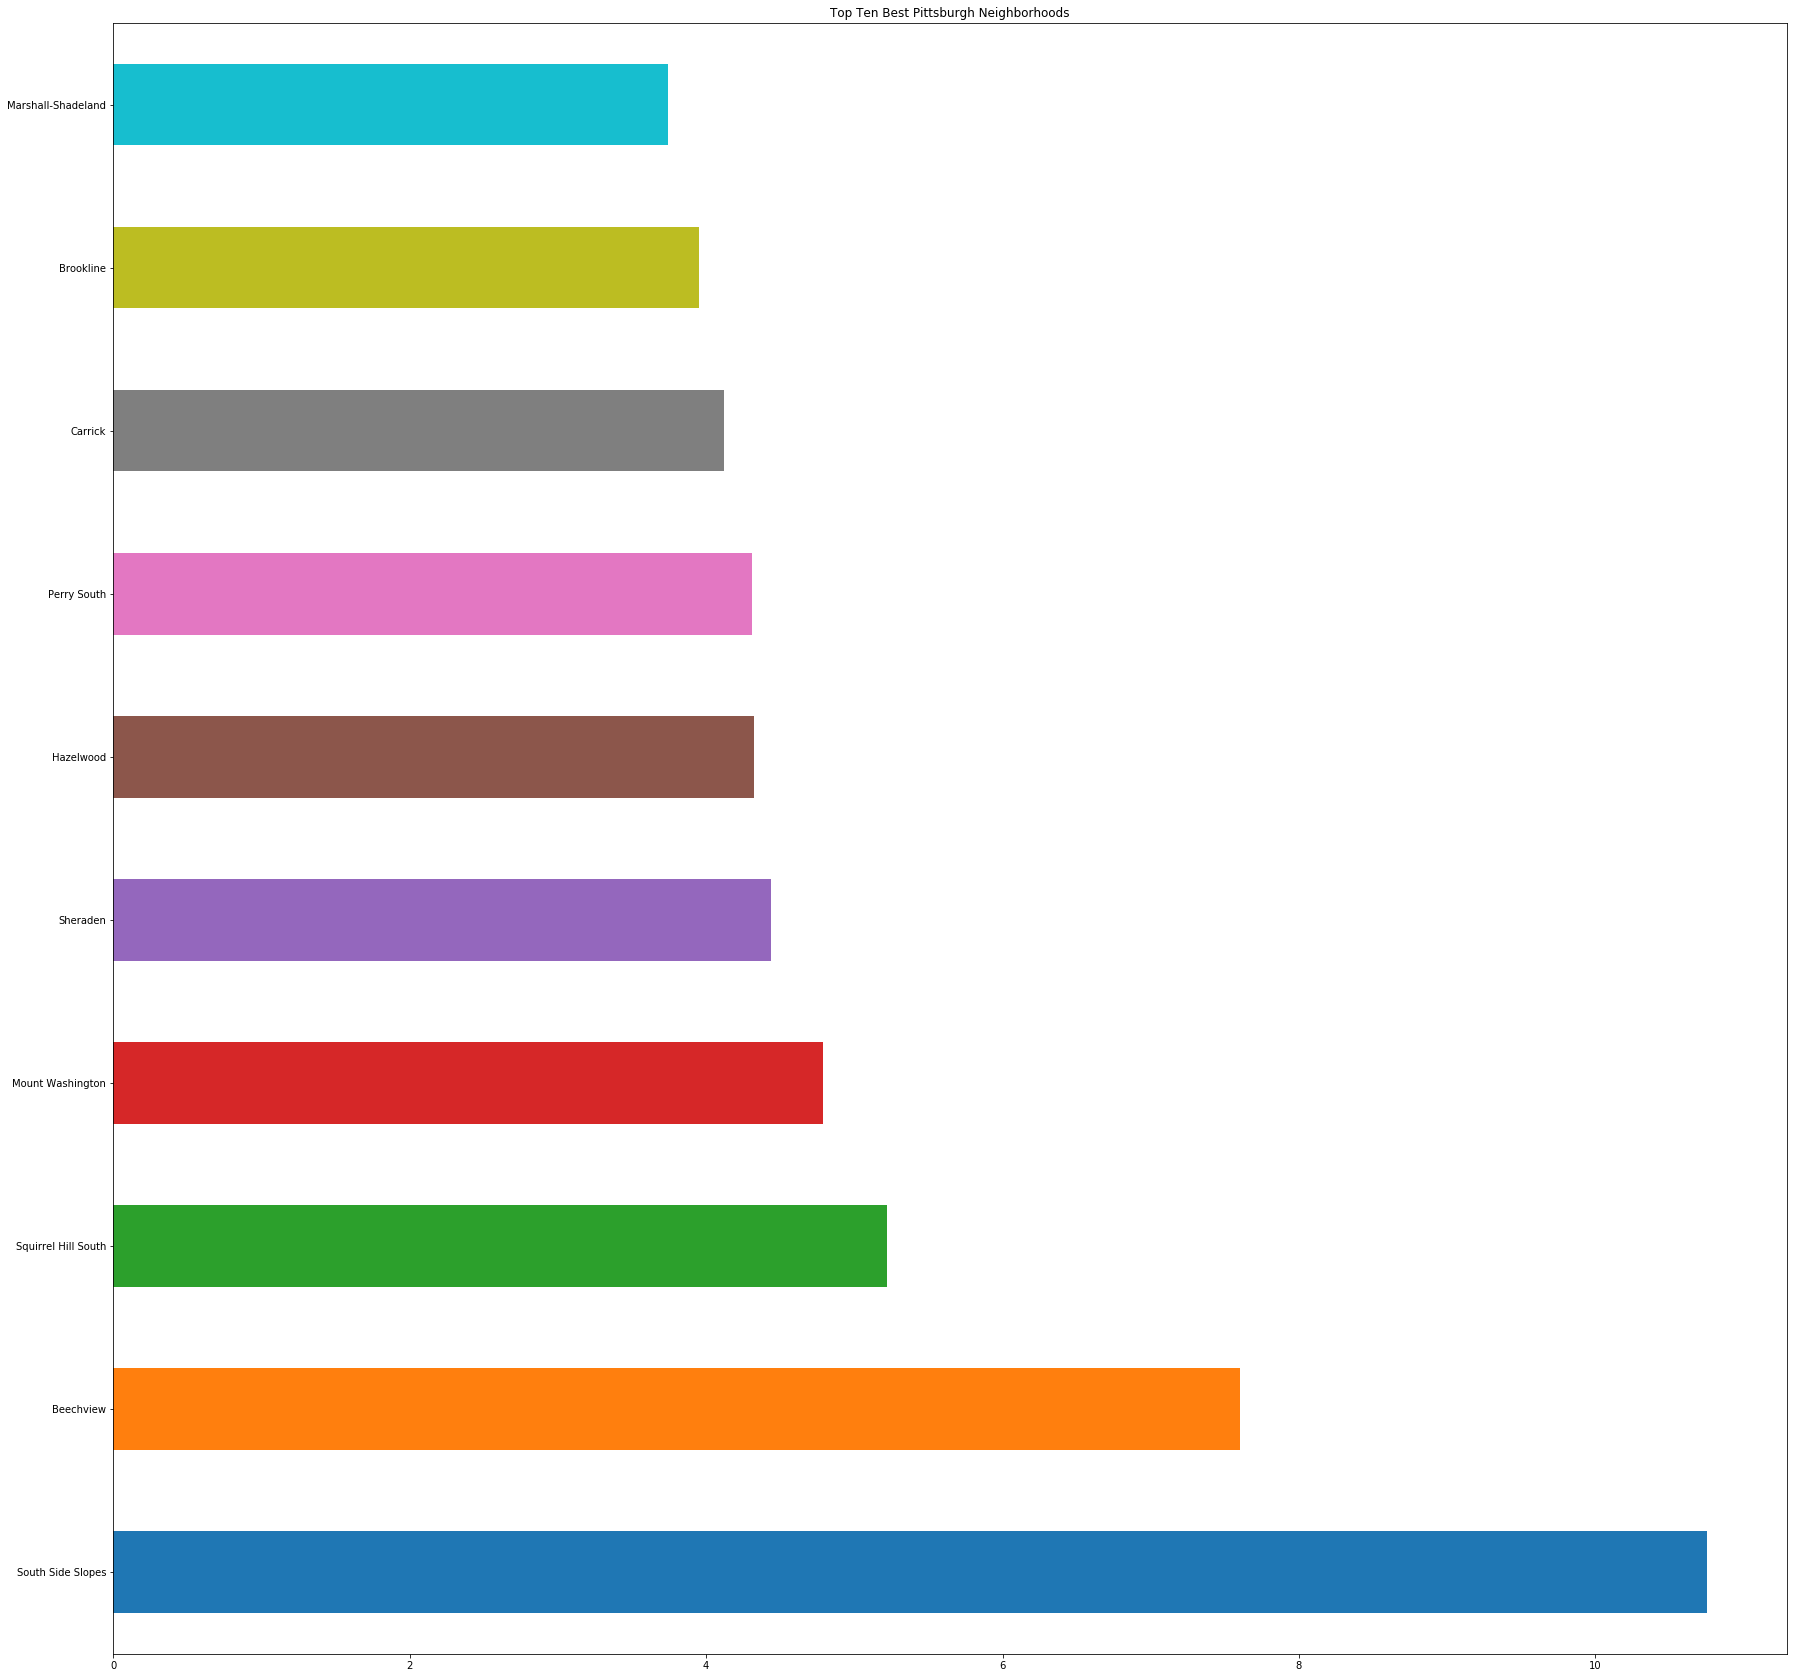

In [27]:
ten=dict(sorted(agg.items(), key=operator.itemgetter(1), reverse=True)[:10])
tens= pd.Series(ten, name='DateValue')
tens.plot.barh(figsize=(30,30))
plt.title("Top Ten Best Pittsburgh Neighborhoods")

### Best Neighborhood
#### The best neighborhood according to our metric is the neighborhood with the highest total score, or the highest combined playground score and steps score. Our final piece of code finds the dictionary object with the highest value. In other words, it prints the name of the neighborhood with the highest total score and thus the best neighborhood.

In [15]:
print("The BEST neighborhood in Pittsburgh is:", max(agg.items(),key=operator.itemgetter(1))[0])

The BEST neighborhood in Pittsburgh is: South Side Slopes


#### According to our metric, **South Side Slopes is the best Pittsburgh neighborhood**. South Side Slopes had the highest total length of steps out of all the neighborhoods at 16,305 and was tied for second in number of playgrounds with 5. With so many steps and playgrounds, the residents of South Side Slopes are very active, or at least have the opportunity to be. South Side Slopes is an incredibly healthy neighborhood to live in. From the graphs, you can see South Side Slopes wins by a landslide, which means it's not even up for debate that it's the best. But, if you need more proof, just look at the pictures below. It is not only a beautiful neighborhood, but because of its high elevation, it also has an incredible view of the city. Honestly, I'd live in South Side Slopes.

![south side slopes](http://images.pittsburghskyline.com/images/2011/08.10/august_2011_pittsburghskyline.com_13.jpg)

![view from sss](https://s19316.pcdn.co/wp-content/uploads/2016/04/DSC05960-600x338-600x338.jpg)

### Emma's Conclusion
#### I don't necessarily have a favorite Pittsburgh neighborhood since I've only been here for a few months. I haven't been to many neighborhoods besides a few close to campus. Oakland does hold a special place in my heart, though, so I guess I'd say Oakland is my favorite neighborhood. Oakland, however, isn't included in the datasets so I guess campus would be considered Central Oakland. Central Oakland is very different from South Side Slopes. In general Central Oakland is mostly Pitt buildings, stores, and a few houses. South Side Slopes is almost entirely residential (with plenty of steps and playgrounds). Since Central Oakland doesn't have too many houses, it makes sense that it would have less playgrounds than a more residential area like South Side Slopes. Central Oakland is also relatively flat until you get to cardiac hill, and there aren't even too many steps going up it. South Side Slopes, on the other hand, is very hilly and thus has a lot more steps. Overall, Central Oakland only had an end score of 0.8778 while South Side Slopes scored a whopping 10.756. So, South Side Slopes clearly has a lot more steps and playgrounds, and is ultimately ~better~ than Central Oakland.

### Sophie's Conclusion
#### Although I am from the Pittsburgh Area, I was still unaware of the existence of most of these neighborhoods. However, Squirrel Hill South is a neighborhood I am very familiar with as I used to spend every Saturday there with friends. When I saw the data for the percentage of playgrounds, I was not surprised to see that Squirrel Hill South had the most number of playgrounds based on our metric considering the neighborhood is so lively and there are so many parks/playgrounds to go to in that area. It also makes sense that they would not have as many steps, although it is still quite hilly, but steps were not put in place to get around the area as they are unnecessary for the particular landscape. The best neighborhood we calculated based off of our metric was the South Side Slopes. This neighborhood is very hilly, and based on the landscape does need steps to move easier through the area. These two neighborhoods balance each other out with Squirrel Hill South having more playgrounds and South Side Slopes having more length of steps. It is interesting to look at the data and see the differences between each neighborhood.

### Darian's Conclusion
#### Conclude